In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [18]:
def load_dataset(data_folder):
    images = []
    labels = []
    for subject_id in range(1, 3):
        subject_folder = os.path.join(data_folder, str(subject_id))
        for img_name in os.listdir(subject_folder):
            img_path = os.path.join(subject_folder, img_name)
            img = Image.open(img_path)
            img_np = np.array(img)
            print(img_np.shape)
            images.append(img_np.flatten())
            labels.append(subject_id)
    return np.array(images), np.array(labels)


In [19]:
def PCA(trn_I, trn_lbl):
    trn_I = trn_I.T  # (5600,16)
    mean = np.mean(trn_I, axis = 1) # along row, or axis 1
    print(mean.shape)
    mean = mean.reshape(mean.shape[0], 1)
    print(mean.shape)

    print(trn_I)
    # broadcasting
    trn_I = trn_I - mean
    print(trn_I)
    
    cov = np.matmul(trn_I.T, trn_I) # (16,16)
    print(cov.shape)
    ev,EV_pseudo = np.linalg.eig(cov)
    EV = np.matmul(trn_I, EV_pseudo)  #(5600, 16)
    print(EV.shape)
    
    fig, axes = plt.subplots(10,1, figsize=(50, 50))  # top ten
    for i in range(10):  # 16 0->15
        temp = EV[:,i].reshape(192,168)
        axes[i].imshow(temp)
    # normalize the eigvctrs
    EV = normalize(EV, norm="l2", axis=1)
    print(EV.shape)
    
    print(ev)
    print(ev.shape)
    idx = np.argsort(ev)
    idx = np.flip(idx) #inc-->dec
    ev = ev[idx]
    print(ev.shape)
    EV = EV[:, idx]
    print(EV.shape)
    return ev, EV, mean
    

In [20]:
imgs, lbls = load_dataset('C:\\Users\\hj191\\Downloads\\data3')

# split
trn_I, tst_I, trn_lbl, tst_lbl = train_test_split(imgs, lbls, test_size = 0.5, random_state = 0)
trn_I.shape

(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)
(192, 168)

(64, 32256)

In [21]:
# 80 * 70

(32256,)
(32256, 1)
[[69 71 47 ...  5  9 17]
 [71 83 50 ...  5  9 19]
 [77 90 54 ...  5 10 23]
 ...
 [23  4 30 ... 60 48 32]
 [23  5 29 ... 59 49 36]
 [26  7 31 ... 62 55 46]]
[[ -5.796875  -3.796875 -27.796875 ... -69.796875 -65.796875 -57.796875]
 [ -5.109375   6.890625 -26.109375 ... -71.109375 -67.109375 -57.109375]
 [ -1.1875    11.8125   -24.1875   ... -73.1875   -68.1875   -55.1875  ]
 ...
 [-33.28125  -52.28125  -26.28125  ...   3.71875   -8.28125  -24.28125 ]
 [-34.421875 -52.421875 -28.421875 ...   1.578125  -8.421875 -21.421875]
 [-33.234375 -52.234375 -28.234375 ...   2.765625  -4.234375 -13.234375]]
(64, 64)
(32256, 64)
(32256, 64)
[ 2.85792353e+09  2.52053432e+09  4.88014940e+08  3.97391498e+08
  1.74128354e+08  1.14890672e+08  1.01470791e+08  7.33074557e+07
  5.93189770e+07  4.27658734e+07  3.22277150e+07  2.74083611e+07
  2.01839205e+07  1.76915125e+07  1.48486373e+07  1.38200547e+07
  1.31614953e+07  1.14161902e+07  1.06427646e+07  8.75812974e+06
  8.62016811e+06  6.86

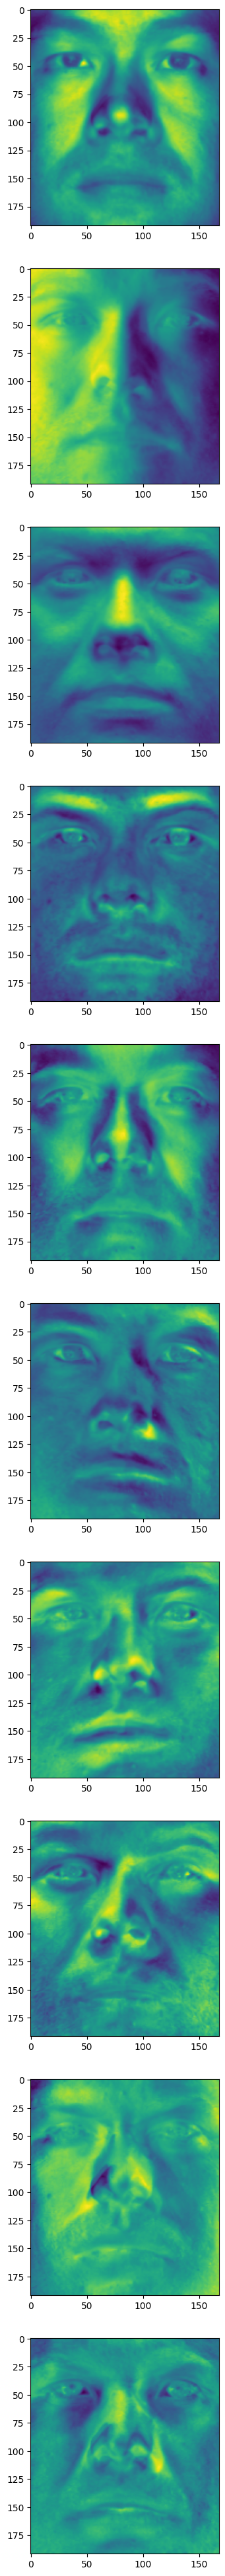

In [22]:
ev, EV, mean = PCA(trn_I, trn_lbl)

In [23]:
ev.shape

(64,)

In [24]:
EV.shape

(32256, 64)

In [25]:
# main
ev = ev.reshape(ev.shape[0],1)
sigma = np.sum(ev,axis = 0)
print(sigma)
k = 0
print(len(trn_lbl))
for i in range(0,len(trn_I[:,0])):
    k += ev[i]/sigma
    if k > 0.95:
        break
print(i)
kbest = EV[:, 0:i] # (5600, 10)
print(kbest.shape)

wts = np.matmul(kbest.T, trn_I.T - mean )  # wts[i,:] = for face i what wt for each of 10 vctr  
print(wts.shape)

def Eigenface_test(tst_I, tst_lbl, trn_lbl, wts, kbest, mean):

    res = []
    
    tst_I = tst_I.T-mean
    tst_lbl = tst_lbl.T

    fig, axes = plt.subplots(4,1, figsize=(25, 25))
    
    tst_wts = np.matmul(kbest.T, tst_I)
    print(tst_wts.shape)
    
    for i in range(len(tst_lbl)):
        print(i)
        tst_wt = tst_wts[:, i]
        print(tst_wt.shape)
        tst_wt = np.resize(tst_wt, (tst_wt.shape[0], 1))
        print(tst_wt.shape)
        
        error = (wts - tst_wt)**2
        sq_error = np.sum(error, axis = 0, keepdims = True) #along columns
        
        print(sq_error.shape)  # (1, 16)
        # print(sq_error)
        
        matched = sq_error.argmin(axis = 1)
        mindist = sq_error[0, matched]
        print(mindist)
        print(matched)
        label = trn_lbl[matched]
        print(label)
        res.append(label[0])
        
        # print("the image is of %d th person"(trn_lbl[matched]))
        temp = tst_I[:,i].reshape(192,168)
        if i <=3:
            axes[i].imshow(temp)
    print("HI")
    print((wts-tst_wt).shape)
    # print(res.shape)
    # res = np.reshape(res.shape[1], 1)
    
    
    print(res)
    print(tst_lbl)
    print(res == tst_lbl)
    return res==tst_lbl        
    
    

[7.11050167e+09]
64
8
(32256, 8)
(8, 64)


In [26]:
print(len(trn_I[:,0]))
print(len(tst_I[:,0]))
print(len(tst_lbl))
for i in range(len(tst_I[:,0])):
    print(i)


64
64
64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [27]:
tst_I.shape

(64, 32256)

(8, 64)
0
(8,)
(8, 1)
(1, 64)
[3.31365446e+10]
[43]
[1]
1
(8,)
(8, 1)
(1, 64)
[5.57405542e+10]
[49]
[2]
2
(8,)
(8, 1)
(1, 64)
[8.81674798e+10]
[23]
[1]
3
(8,)
(8, 1)
(1, 64)
[4.26554799e+10]
[42]
[2]
4
(8,)
(8, 1)
(1, 64)
[1.31051816e+11]
[13]
[2]
5
(8,)
(8, 1)
(1, 64)
[1.12183105e+11]
[63]
[1]
6
(8,)
(8, 1)
(1, 64)
[7.27353976e+09]
[29]
[2]
7
(8,)
(8, 1)
(1, 64)
[1.46275428e+10]
[19]
[1]
8
(8,)
(8, 1)
(1, 64)
[4.02495363e+10]
[6]
[2]
9
(8,)
(8, 1)
(1, 64)
[3.61558611e+10]
[7]
[1]
10
(8,)
(8, 1)
(1, 64)
[1.19166872e+10]
[58]
[2]
11
(8,)
(8, 1)
(1, 64)
[9.63415087e+10]
[56]
[1]
12
(8,)
(8, 1)
(1, 64)
[1.71818464e+10]
[37]
[1]
13
(8,)
(8, 1)
(1, 64)
[2.76524859e+10]
[24]
[1]
14
(8,)
(8, 1)
(1, 64)
[3.75926358e+10]
[19]
[1]
15
(8,)
(8, 1)
(1, 64)
[1.72474415e+10]
[17]
[2]
16
(8,)
(8, 1)
(1, 64)
[6.52694175e+10]
[11]
[1]
17
(8,)
(8, 1)
(1, 64)
[1.18278356e+10]
[46]
[1]
18
(8,)
(8, 1)
(1, 64)
[1.04431373e+11]
[53]
[2]
19
(8,)
(8, 1)
(1, 64)
[1.13356652e+11]
[49]
[2]
20
(8,)
(8, 1)
(1, 64)
[

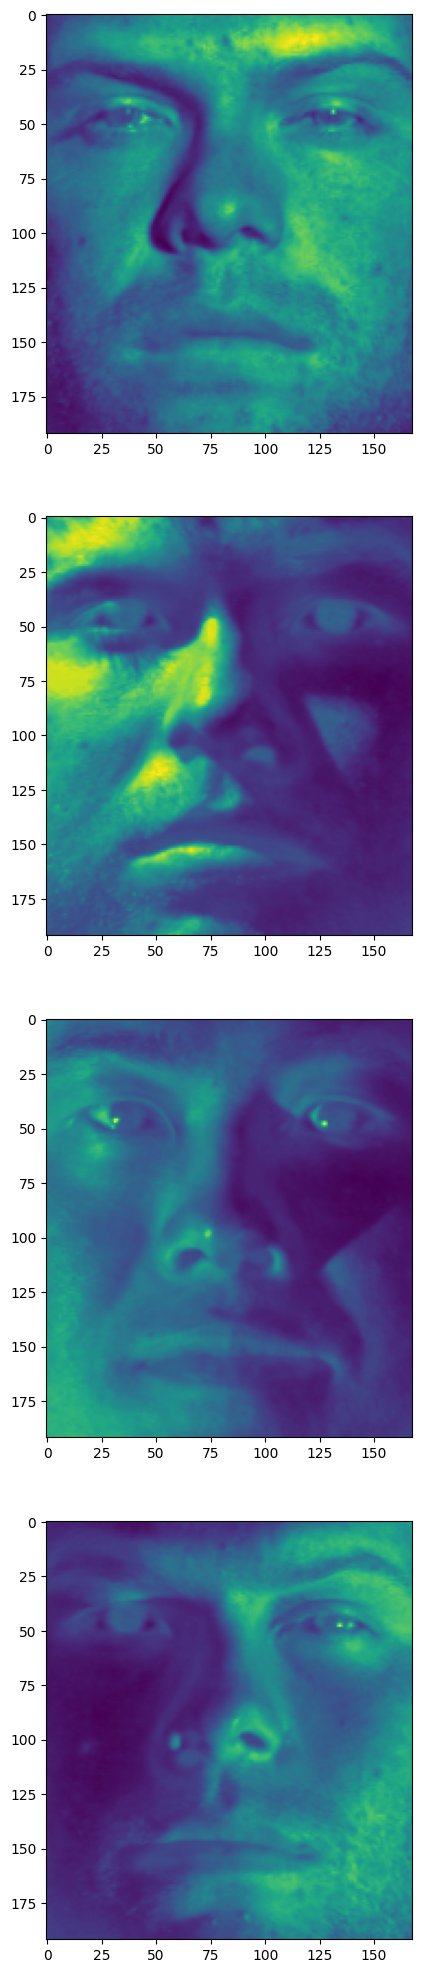

In [28]:
answer = Eigenface_test(tst_I, tst_lbl, trn_lbl, wts, kbest, mean)

In [29]:
accuracy = ((answer).sum())*100/len(answer)
print(accuracy)

50.0
